In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [4]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).
MaxtempF = []
humidityperc = []
cloudiness = []
windmph = []
mod_cities = []
mod_lat = []
mod_lngs = []
country = []

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
for i, city in enumerate(cities):
    api = url + "&q=" + city.replace(" ","+")
    response = requests.get(api)
    weather_data = response.json()
    print("Processing Record " + str(i+1) + " of set 1 |" + str(city))
    
    try:
        mod_lat.append(weather_data['coord']['lat'])
        mod_lngs.append(weather_data['coord']['lon'])
        country.append(weather_data['sys']['country'])
        mod_cities.append(weather_data['name'])
        MaxtempF.append(weather_data["main"]["temp_max"])
        humidityperc.append(weather_data['main']['humidity'])
        cloudiness.append(weather_data['visibility'])
        windmph.append(weather_data['wind']['speed'])
    except: 
        print(city + " not found in API response.")
    i += 1


Processing Record 1 of set 1 |busselton
Processing Record 2 of set 1 |port lincoln
Processing Record 3 of set 1 |sorong
Processing Record 4 of set 1 |san quintin
Processing Record 5 of set 1 |jamestown
Processing Record 6 of set 1 |vila velha
Processing Record 7 of set 1 |los llanos de aridane
Processing Record 8 of set 1 |ahuimanu
Processing Record 9 of set 1 |touros
Processing Record 10 of set 1 |rikitea
Processing Record 11 of set 1 |inhambane
Processing Record 12 of set 1 |mirnyy
Processing Record 13 of set 1 |lavrentiya
Processing Record 14 of set 1 |bambous virieux
Processing Record 15 of set 1 |kapaa
Processing Record 16 of set 1 |albany
Processing Record 17 of set 1 |vagur
Processing Record 18 of set 1 |dalby
Processing Record 19 of set 1 |nanuque
Processing Record 20 of set 1 |tiksi
Processing Record 21 of set 1 |luderitz
Processing Record 22 of set 1 |nanortalik
Processing Record 23 of set 1 |kahului
Processing Record 24 of set 1 |port alfred
Processing Record 25 of set 1 |ea

In [5]:
north_lat = [] # establishes northern and southern hemisphere values to plot
north_t = []
north_h = []
north_c = []
north_ws = []
south_lat = []
south_t = []
south_h = []
south_c = []
south_ws = []
for x in range(len(mod_lngs)):
    if mod_lngs[x] > 0:
        north_lat.append(mod_lat[x])
        north_t.append(MaxtempF[x])
        north_h.append(humidityperc[x])
        north_c.append(cloudiness[x])
        north_ws.append(windmph[x])
        x += 1
    else:
        south_lat.append(mod_lat[x])
        south_t.append(MaxtempF[x])
        south_h.append(humidityperc[x])
        south_c.append(cloudiness[x])
        south_ws.append(windmph[x])
        x += 1


In [6]:
#Export the city data into a .csv.
os.getcwd()

'/Users/tonypalazzolo/API-JSON-Challenge-II'

In [7]:
#Display the DataFrame
weather_df = pd.DataFrame({"city": mod_cities,
                           "country": country,
                            "longitude": mod_lngs,
                            "latitude": mod_lat,
                           "Temperature F": MaxtempF,
                           "Humidity %":humidityperc,
                           "Cloudiness": cloudiness,
                           "Wind Speed mph": windmph})
weather_df.to_csv('cities.csv', index=False, header=True)
weather_df

,city,country,longitude,latitude,Temperature F,Humidity %,Cloudiness,Wind Speed mph
0,Busselton,AU,115.33,-33.65,66.00,69,10000,1.99
1,Port Lincoln,AU,135.87,-34.73,56.48,73,10000,9.10
2,Sorong,ID,131.25,-0.88,82.74,78,10000,11.65
3,San Quintín,MX,-115.95,30.48,61.70,49,10000,4.25
4,Jamestown,US,-79.24,42.10,34.00,94,3219,14.65
...,...,...,...,...,...,...,...,...
577,Poum,NC,164.02,-20.23,78.73,77,10000,6.17
578,Pochutla,MX,-96.47,15.74,84.99,61,9656,2.17
579,Iranshahr,IR,60.68,27.20,62.60,34,10000,6.93
580,Keetmanshoop,NA,18.13,-26.58,88.68,24,10000,17.16


In [8]:
weather_df.describe()

,longitude,latitude,Temperature F,Humidity %,Cloudiness,Wind Speed mph
count,582.00000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,22.29988,19.361564,52.750911,73.393471,8965.943299,7.968591
std,89.24024,33.072179,31.560591,19.781113,2595.469891,6.134930
min,-179.17000,-54.800000,-45.900000,10.000000,89.000000,0.110000
25%,-54.23750,-8.417500,34.000000,65.000000,10000.000000,3.602500
50%,27.95500,22.705000,62.600000,78.500000,10000.000000,6.710000
75%,100.30500,47.355000,78.172500,88.000000,10000.000000,10.290000
max,178.42000,78.220000,97.200000,100.000000,10000.000000,53.020000


In [9]:
weather_df.columns
weather_df["Humidity %"].max()
#no cities display greater than 100% humidity

100

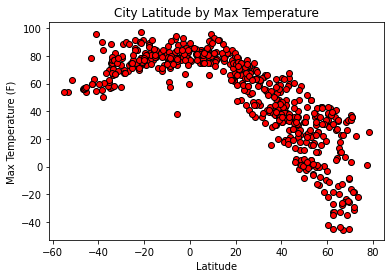

In [10]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.
        # northern hemisphere has positive longitude, southern has negative

plt.scatter(mod_lat, MaxtempF, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude by Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("city_max_temp.png")
plt.show()
##Analysis- there seems to be a generally negative correlation; temperature decreases as latitude increases.
#           max temps occur at latitudes between ~-30 to 10 degrees in latitude

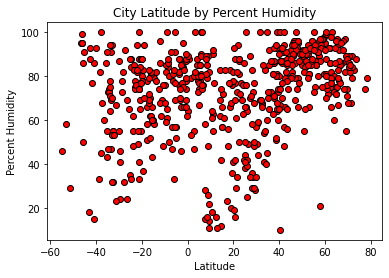

In [11]:
plt.scatter(mod_lat,humidityperc, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude by Percent Humidity")
plt.xlabel("Latitude")
plt.ylabel("Percent Humidity")
plt.savefig("city_humidity.png")
plt.show()
## ANALYSIS - there seems to be no correlation between city by latitude and humidity. It seems fairly distributed
#             accross locations, regardless of area.

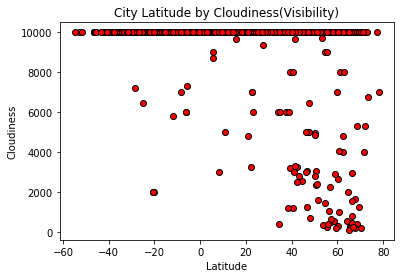

In [12]:
plt.scatter( mod_lat,cloudiness, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude by Cloudiness(Visibility)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("city_cloudiness.png")
plt.show()
## ANALYSIS - cloudiness (visibility) seems to slightly skew negatively for higher latitudes
#.            althought a slight negative correlation, cloudiness remains fairly consistens in magnitude accross 
#.             cities.

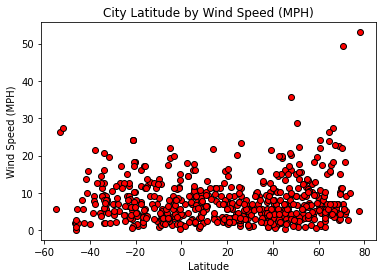

In [13]:
plt.scatter(mod_lat,windmph, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude by Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)") 
plt.savefig("city_wind_speed.png")
plt.show()
## ANALYSIS - There is no apparent trent in data for city and wind speed; not much data apparent 
#.            for wind speeds greater than 30 mph

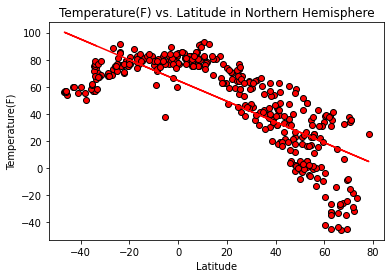

r value for temp vs. latitude(N) is -0.7641735833786841
Northern y = -0.77x + 64.59
As predicted, there is a fairly strong negative trend for temperatures by latitude, indicated by r= -0.7641735833786841.


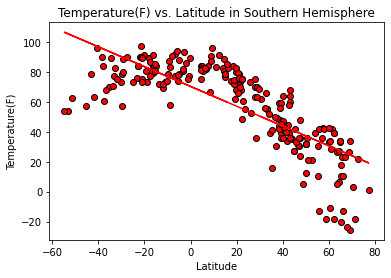

Southern r value for temp vs latitude(S) -0.7752312034356971
y = -0.66x + 70.32
As predicted, there is a fairly strong negative trend for temperatures by latitude, indicated by r= -0.7752312034356971.
This does not seem to change significantly between Northern and Southern Hemispheres.


In [14]:
#Northern Hemisphere - Temperature (F) vs. Latitude (long > 0)
north_lat_series = pd.Series(north_lat)
slopent, interceptnt, rvaluent, pvaluent, stderrnt = linregress(north_lat, north_t)
rnt = north_lat_series * slopent + interceptnt
line_eq_nt = "y = " + str(round(slopent,2)) + "x + " + str(round(interceptnt,2))
plt.scatter(north_lat,north_t, marker="o", facecolors="red", edgecolors="black")
plt.plot(north_lat,rnt,"r-")
plt.title("Temperature(F) vs. Latitude in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)") 
plt.savefig("city_tempvs_lat_n.png")
plt.show()
print( "r value for temp vs. latitude(N) is " + str(rvaluent))
print("Northern " + line_eq_nt)
##ANALYSIS
print("As predicted, there is a fairly strong negative trend for temperatures by latitude, indicated by r= " + str(rvaluent) + "." )


#Southern Hemisphere - Temperature (F) vs. Latitude (long < 0)
south_lat_series = pd.Series(south_lat)
slopest, interceptst, rvaluest, pvaluest, stderrst = linregress(south_lat, south_t)
rst = south_lat_series * slopest + interceptst
line_eq_st = "y = " + str(round(slopest,2)) + "x + " + str(round(interceptst,2))
plt.scatter(south_lat,south_t, marker="o", facecolors="red", edgecolors="black")
plt.plot(south_lat,rst,"r-")
plt.title("Temperature(F) vs. Latitude in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.savefig("city_tempvs_lat_s.png")
plt.show()
print( "Southern r value for temp vs latitude(S) " + str(rvaluest))
print(line_eq_st)
# ANALYSIS
print("As predicted, there is a fairly strong negative trend for temperatures by latitude, indicated by r= " + str(rvaluest) + "." )
print("This does not seem to change significantly between Northern and Southern Hemispheres.")




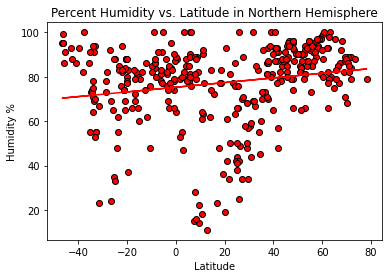

r value for temp vs. Humidity(N) is 0.19359308938112416
Northern y = 0.11x + 75.24
Relative to Southern Hemisphere, there is a slight posistive trend for humidity by latitude, according to the
r-value.


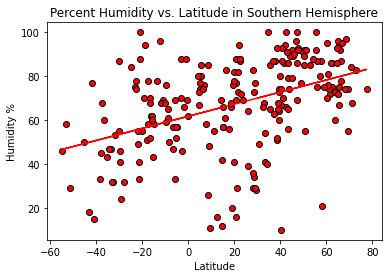

r value for temp vs. Humidity(S) is 0.4337647474546732
Southern y = 0.28x + 61.76
there is about zero correlation in data for the Southern Hemisphere by percent humidiy


In [15]:
#Northern Hemisphere - Humidity (%) vs. Latitude

slopenh, interceptnh, rvaluenh, pvaluenh, stderrnh = linregress(north_lat, north_h)
rnh = north_lat_series * slopenh + interceptnh
line_eq_nh = "y = " + str(round(slopenh,2)) + "x + " + str(round(interceptnh,2))
plt.scatter(north_lat,north_h, marker="o", facecolors="red", edgecolors="black")
plt.plot(north_lat,rnh,"r-")
plt.title("Percent Humidity vs. Latitude in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity %") 
plt.savefig("city_humvs_lat_n.png")
plt.show()
print( "r value for temp vs. Humidity(N) is " + str(rvaluenh))
print("Northern " + line_eq_nh)
# ANALYSIS
print("Relative to Southern Hemisphere, there is a slight posistive trend for humidity by latitude, according to the")
print ("r-value.")

#Southern Hemisphere - Humidity (%) vs. Latitude

slopesh, interceptsh, rvaluesh, pvaluesh, stderrsh = linregress(south_lat, south_h)
rsh = south_lat_series * slopesh + interceptsh
line_eq_sh = "y = " + str(round(slopesh,2)) + "x + " + str(round(interceptsh,2))
plt.plot(south_lat,rsh,"r-")
plt.scatter(south_lat,south_h, marker="o", facecolors="red", edgecolors="black")
plt.title("Percent Humidity vs. Latitude in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.savefig("city_humvs_lat_s.png")
plt.show()
print( "r value for temp vs. Humidity(S) is " + str(rvaluesh))
print("Southern " + line_eq_sh)
# Analysis
print("there is about zero correlation in data for the Southern Hemisphere by percent humidiy")


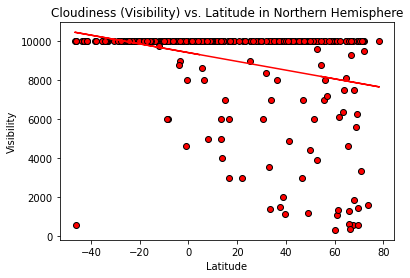

r value for temp vs. cloudiness (N) is -0.318869249690197
Northern y = -22.5x + 9421.88


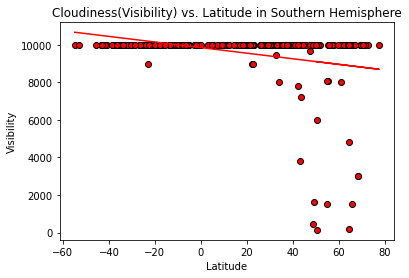

r value for temp vs. cloudiness(S) is -0.28367348533285325
Southern y = -14.9x + 9850.99


In [193]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
slopenc, interceptnc, rvaluenc, pvaluenc, stderrnc = linregress(north_lat, north_c)
rnc = north_lat_series * slopenc + interceptnc
line_eq_nc = "y = " + str(round(slopenc,2)) + "x + " + str(round(interceptnc,2))
plt.plot(north_lat,rnc,"r-")
plt.scatter(north_lat,north_c, marker="o", facecolors="red", edgecolors="black")
plt.title("Cloudiness (Visibility) vs. Latitude in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Visibility") 
plt.savefig("city_clvs_lat_n.png")
plt.show()
print( "r value for temp vs. cloudiness (N) is " + str(rvaluenc))
print("Northern " + line_eq_nc)
#Southern Hemisphere - Cloudiness (%) vs. Latitude
slopesc, interceptsc, rvaluesc, pvaluesc, stderrsc = linregress(south_lat, south_c)
rsc = south_lat_series * slopesc + interceptsc
line_eq_sc = "y = " + str(round(slopesc,2)) + "x + " + str(round(interceptsc,2))
plt.plot(south_lat,rsc,"r-")
plt.scatter(south_lat, south_c, marker="o", facecolors="red", edgecolors="black")
plt.title("Cloudiness(Visibility) vs. Latitude in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Visibility")
plt.savefig("city_clvs_lat_s.png")
plt.show()
print( "r value for temp vs. cloudiness(S) is " + str(rvaluesc))
print("Southern " + line_eq_sc)
# ANALYSIS
print("There appears a consistent, slightly negative trend for both Hemispheres regarding cloudiness data by latitude")

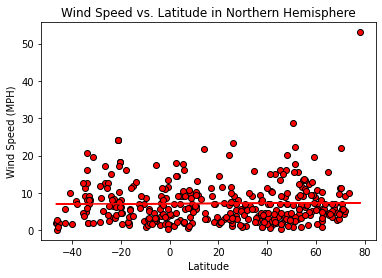

r value for temp vs. wind speed (N) is 0.014523429629515706
Northern y = 0.0x + 7.15
There is a slight negative correlation of wind speed by city for the Northern Hemisphere


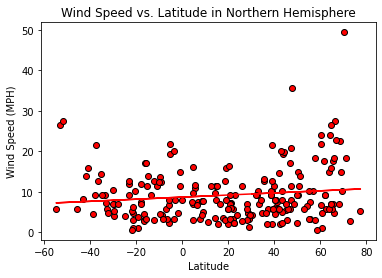

r value for temp vs. wind speed (S) is 0.1290223267547975
Southern y = 0.03x + 8.7
Opposed to the Northern Hemisphere, there is a slight positive correlation of wind speed by city; it is 
unknown if these disparities in relationship for wind speed is statistically significant


In [16]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
slopenws, interceptnws, rvaluenws, pvaluenws, stderrnws = linregress(north_lat, north_ws)
rnws = north_lat_series * slopenws + interceptnws
line_eq_nws = "y = " + str(round(slopenws,2)) + "x + " + str(round(interceptnws,2))
plt.plot(north_lat,rnws,"r-")
plt.scatter(north_lat,north_ws, marker="o", facecolors="red", edgecolors="black")
plt.title("Wind Speed vs. Latitude in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("city_wsvs_lat_n.png")
plt.show()
print( "r value for temp vs. wind speed (N) is " + str(rvaluenws))
print("Northern " + line_eq_nws)

# ANALYSIS
print("There is a slight negative correlation of wind speed by city for the Northern Hemisphere")
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

slopesws, interceptsws, rvaluesws, pvaluesws, stderrsws = linregress(south_lat, south_ws)
rsws = south_lat_series * slopesws + interceptsws
line_eq_sws = "y = " + str(round(slopesws,2)) + "x + " + str(round(interceptsws,2))
plt.plot(south_lat,rsws,"r-")
plt.scatter(south_lat,south_ws, marker="o", facecolors="red", edgecolors="black")
plt.title("Wind Speed vs. Latitude in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("city_wsvs_lat_s.png")
plt.show()
print( "r value for temp vs. wind speed (S) is " + str(rvaluesws))
print("Southern " + line_eq_sws)
# Analysis
print("Opposed to the Northern Hemisphere, there is a slight positive correlation of wind speed by city; it is ")
print("unknown if these disparities in relationship for wind speed is statistically significant")